In [18]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import calendar
import matplotlib.dates as mdates
import datetime as dt
from datetime import datetime 
from dateutil.parser import parse 
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor




In [2]:
bikes_day = pd.read_csv('/Users/CW/Desktop/0_CAB/Bike_Project/day.csv', sep =',')

display(bikes_day.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [32]:
display(bikes_day.tail())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [33]:
print(bikes_day.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [34]:
print("Number of duplicate rows: ", bikes_day.duplicated().sum())

Number of duplicate rows:  0


In [35]:
print(bikes_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [8]:
data = bikes_day
print('Original dataset shape:', bikes_day.shape)

Original dataset shape: (731, 16)


In [36]:
bikes_day = bikes_day.drop_duplicates()


In [37]:
data = bikes_day
print('Original dataset shape:', bikes_day.shape)

# remove duplicates from the dataset
bikes_cleaned = bikes_day.drop_duplicates()

# print the number of rows in the cleaned dataset

print('Cleaned dataset shape:', bikes_cleaned.shape)

Original dataset shape: (731, 16)
Cleaned dataset shape: (731, 16)


In [38]:
print(bikes_day.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [12]:
bikes_day['dteday'] = pd.to_datetime(bikes_day['dteday'])
bikes_day['weekday_01'] = bikes_day['dteday'].dt.day_name()

print(bikes_day.head(10))

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   
5        6 2011-01-06       1   0     1        0        4           1   
6        7 2011-01-07       1   0     1        0        5           1   
7        8 2011-01-08       1   0     1        0        6           0   
8        9 2011-01-09       1   0     1        0        0           0   
9       10 2011-01-10       1   0     1        0        1           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696

In [3]:
#Create a new column for Weekend 


# Convert the 'dteday' column to a pandas DateTimeIndex
bikes_day['dteday'] = pd.to_datetime(bikes_day['dteday'])

# Create a new column 'is_weekend' with True for weekend days and False otherwise
bikes_day['is_weekend'] = bikes_day['dteday'].dt.weekday.isin({5, 6})

# Show the first 10 rows of the modified DataFrame
print(bikes_day.head(10))


   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   
5        6 2011-01-06       1   0     1        0        4           1   
6        7 2011-01-07       1   0     1        0        5           1   
7        8 2011-01-08       1   0     1        0        6           0   
8        9 2011-01-09       1   0     1        0        0           0   
9       10 2011-01-10       1   0     1        0        1           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696

In [4]:
bikes_day['weekday_01'] = bikes_day['dteday'].dt.day_name()

print(bikes_day.head(10))

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   
5        6 2011-01-06       1   0     1        0        4           1   
6        7 2011-01-07       1   0     1        0        5           1   
7        8 2011-01-08       1   0     1        0        6           0   
8        9 2011-01-09       1   0     1        0        0           0   
9       10 2011-01-10       1   0     1        0        1           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696

In [15]:

# replace 0 with 'No' and 1 with 'Yes' in the 'holiday' column
bikes_day['holiday'] = bikes_day['holiday'].replace({0: 'No', 1: 'Yes'})

# print the updated DataFrame
print(bikes_day)



     instant     dteday  season  yr  mnth holiday  weekday  workingday  \
0          1 2011-01-01       1   0     1      No        6           0   
1          2 2011-01-02       1   0     1      No        0           0   
2          3 2011-01-03       1   0     1      No        1           1   
3          4 2011-01-04       1   0     1      No        2           1   
4          5 2011-01-05       1   0     1      No        3           1   
..       ...        ...     ...  ..   ...     ...      ...         ...   
726      727 2012-12-27       1   1    12      No        4           1   
727      728 2012-12-28       1   1    12      No        5           1   
728      729 2012-12-29       1   1    12      No        6           0   
729      730 2012-12-30       1   1    12      No        0           0   
730      731 2012-12-31       1   1    12      No        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.36

In [16]:


# replace the values in the 'season' column
bikes_day['season'] = bikes_day['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# print the updated DataFrame
print(bikes_day)


     instant     dteday  season  yr  mnth holiday  weekday  workingday  \
0          1 2011-01-01  Winter   0     1      No        6           0   
1          2 2011-01-02  Winter   0     1      No        0           0   
2          3 2011-01-03  Winter   0     1      No        1           1   
3          4 2011-01-04  Winter   0     1      No        2           1   
4          5 2011-01-05  Winter   0     1      No        3           1   
..       ...        ...     ...  ..   ...     ...      ...         ...   
726      727 2012-12-27  Winter   1    12      No        4           1   
727      728 2012-12-28  Winter   1    12      No        5           1   
728      729 2012-12-29  Winter   1    12      No        6           0   
729      730 2012-12-30  Winter   1    12      No        0           0   
730      731 2012-12-31  Winter   1    12      No        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.36

In [20]:


# replace 0 with 'No' and 1 with 'Yes' in the 'holiday' column
bikes_day['workingday'] = bikes_day['workingday'].replace({0: 'No', 1: 'Yes'})

# print the updated DataFrame
print(bikes_day)

     instant     dteday  season  yr      mnth holiday  weekday workingday  \
0          1 2011-01-01  Winter   0   January      No        6         No   
1          2 2011-01-02  Winter   0   January      No        0         No   
2          3 2011-01-03  Winter   0   January      No        1        Yes   
3          4 2011-01-04  Winter   0   January      No        2        Yes   
4          5 2011-01-05  Winter   0   January      No        3        Yes   
..       ...        ...     ...  ..       ...     ...      ...        ...   
726      727 2012-12-27  Winter   1  December      No        4        Yes   
727      728 2012-12-28  Winter   1  December      No        5        Yes   
728      729 2012-12-29  Winter   1  December      No        6         No   
729      730 2012-12-30  Winter   1  December      No        0         No   
730      731 2012-12-31  Winter   1  December      No        1        Yes   

     weathersit      temp     atemp       hum  windspeed  casual  registere

Second CSV File import 

In [21]:
bikes_hour = pd.read_csv('/Users/CW/Desktop/0_CAB/Bike_Project/hour.csv', sep =',')

display(bikes_hour.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [22]:
parse_dates=['date'] ####will make the date column to be parsed as a date field ####

In [23]:
display(bikes_hour.tail())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [ ]:
df.to_csv('data_with_reset_index.csv', index=False)

In [ ]:
df = bikes_hour
print('Original dataset shape:', bikes_day.shape)

Original dataset shape: (731, 18)


In [ ]:


# replace 0 with 'No' and 1 with 'Yes' in the 'holiday' column
bikes_hour['workingday'] = bikes_hour['workingday'].replace({0: 'No', 1: 'Yes'})

# print the updated DataFrame
print(bikes_hour)


       instant      dteday  season  yr  mnth  hr  holiday  weekday workingday  \
0            1  2011-01-01       1   0     1   0        0        6         No   
1            2  2011-01-01       1   0     1   1        0        6         No   
2            3  2011-01-01       1   0     1   2        0        6         No   
3            4  2011-01-01       1   0     1   3        0        6         No   
4            5  2011-01-01       1   0     1   4        0        6         No   
...        ...         ...     ...  ..   ...  ..      ...      ...        ...   
17374    17375  2012-12-31       1   1    12  19        0        1        Yes   
17375    17376  2012-12-31       1   1    12  20        0        1        Yes   
17376    17377  2012-12-31       1   1    12  21        0        1        Yes   
17377    17378  2012-12-31       1   1    12  22        0        1        Yes   
17378    17379  2012-12-31       1   1    12  23        0        1        Yes   

       weathersit  temp   a

In [ ]:

print('Original dataset shape:', bikes_hour.shape)

# remove duplicates from the dataset
bikes_cleaned = bikes_hour.drop_duplicates()

# print the number of rows in the cleaned dataset

print('Cleaned dataset shape:', bikes_cleaned.shape)

Original dataset shape: (17379, 17)
Cleaned dataset shape: (17379, 17)


In [ ]:
print(bikes_hour.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
# replace the values in the 'season' column
bikes_hour['season'] = bikes_hour['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# print the updated DataFrame
print(bikes_hour)


       instant      dteday  season  yr  mnth  hr  holiday  weekday workingday  \
0            1  2011-01-01  Winter   0     1   0        0        6         No   
1            2  2011-01-01  Winter   0     1   1        0        6         No   
2            3  2011-01-01  Winter   0     1   2        0        6         No   
3            4  2011-01-01  Winter   0     1   3        0        6         No   
4            5  2011-01-01  Winter   0     1   4        0        6         No   
...        ...         ...     ...  ..   ...  ..      ...      ...        ...   
17374    17375  2012-12-31  Winter   1    12  19        0        1        Yes   
17375    17376  2012-12-31  Winter   1    12  20        0        1        Yes   
17376    17377  2012-12-31  Winter   1    12  21        0        1        Yes   
17377    17378  2012-12-31  Winter   1    12  22        0        1        Yes   
17378    17379  2012-12-31  Winter   1    12  23        0        1        Yes   

       weathersit  temp   a

In [ ]:
bikes_hour.head ()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,1,0,0,6,No,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,1,1,0,6,No,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,1,2,0,6,No,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,0,1,3,0,6,No,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,0,1,4,0,6,No,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:

bikes_hour['mnth'] = bikes_hour['mnth'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

# print the updated DataFrame
print(bikes_hour)

       instant      dteday  season  yr      mnth  hr  holiday  weekday  \
0            1  2011-01-01  Winter   0   January   0        0        6   
1            2  2011-01-01  Winter   0   January   1        0        6   
2            3  2011-01-01  Winter   0   January   2        0        6   
3            4  2011-01-01  Winter   0   January   3        0        6   
4            5  2011-01-01  Winter   0   January   4        0        6   
...        ...         ...     ...  ..       ...  ..      ...      ...   
17374    17375  2012-12-31  Winter   1  December  19        0        1   
17375    17376  2012-12-31  Winter   1  December  20        0        1   
17376    17377  2012-12-31  Winter   1  December  21        0        1   
17377    17378  2012-12-31  Winter   1  December  22        0        1   
17378    17379  2012-12-31  Winter   1  December  23        0        1   

      workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0             No           1  0.24  0.28

In [ ]:
#do the same with weithersit column

bikes_day['weathersit'] = bikes_day['weathersit'].replace({1: 'Excellent', 2: 'Good', 3: 'Fair', 4: 'Poor'})

# print the updated DataFrame
print(bikes_day)

     instant     dteday  season  yr      mnth holiday  weekday workingday  \
0          1 2011-01-01  Winter   0   January      No        6         No   
1          2 2011-01-02  Winter   0   January      No        0         No   
2          3 2011-01-03  Winter   0   January      No        1        Yes   
3          4 2011-01-04  Winter   0   January      No        2        Yes   
4          5 2011-01-05  Winter   0   January      No        3        Yes   
..       ...        ...     ...  ..       ...     ...      ...        ...   
726      727 2012-12-27  Winter   1  December      No        4        Yes   
727      728 2012-12-28  Winter   1  December      No        5        Yes   
728      729 2012-12-29  Winter   1  December      No        6         No   
729      730 2012-12-30  Winter   1  December      No        0         No   
730      731 2012-12-31  Winter   1  December      No        1        Yes   

    weathersit      temp     atemp       hum  windspeed  casual  registered

NameError: name 'line1' is not defined

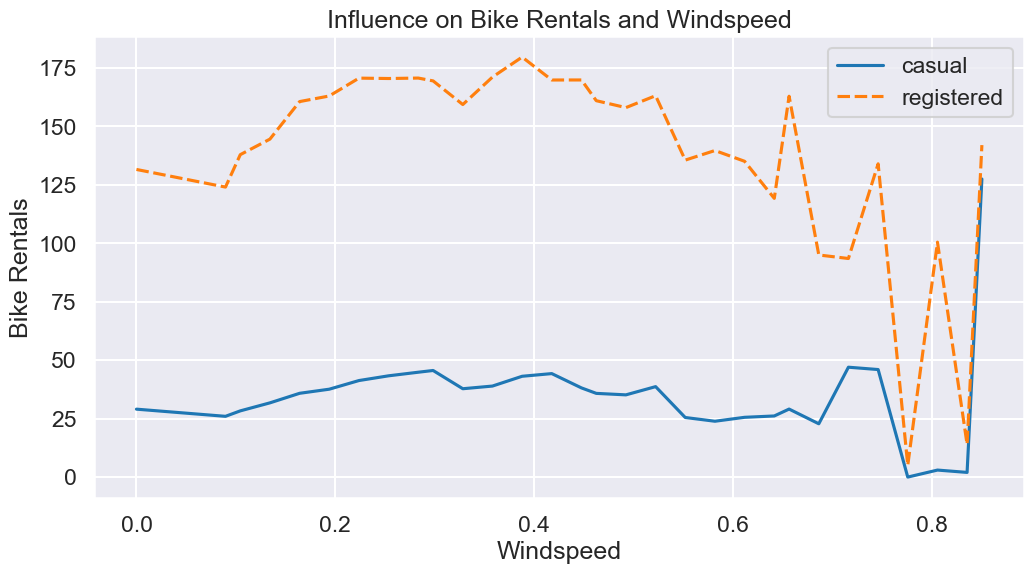

In [ ]:
# Group the data by hour and calculate the average count for members and non-members (got the code from Natalie, used group by method)
bikes_hour = bikes_hour.groupby('windspeed')[['casual', 'registered']].mean()

# Plot the hourly trend for members and non-members
plt.figure(figsize=(12,6))
sns.lineplot(data=bikes_hour)
plt.xlabel('Windspeed')
plt.ylabel('Bike Rentals')
plt.title('Influence on Bike Rentals and Windspeed')
#plt.legend('Registered', 'Casual')#
plt.legend(handles=[line1, line2])
plt.show()

/var/folders/28/lqytsck570bbnwy7thfhf1m40000gn/T/ipykernel_9828/2311645102.py:11: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Registered', 'Casual')


NameError: name 'mlines' is not defined

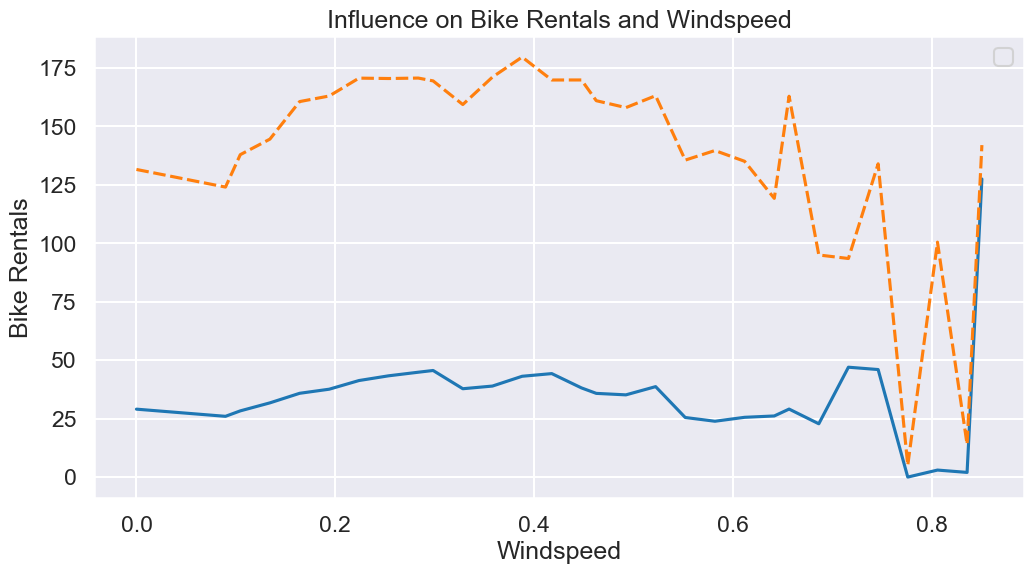

In [ ]:
###trying to fix the problem with the legend not showing 

bikes_hour = bikes_hour.groupby('windspeed')[['casual', 'registered']].mean()

# Plot the hourly trend for members and non-members
plt.figure(figsize=(12,6))
sns.lineplot(data=bikes_hour)
plt.xlabel('Windspeed')
plt.ylabel('Bike Rentals')
plt.title('Influence on Bike Rentals and Windspeed')
plt.legend('Registered', 'Casual')
#line1 = mlines.Line2D([], [], color='blue', label='Registered')
#line2 = mlines.Line2D([], [], color='orange', label='Casual')#
plt.legend(handles=[line1, line2])

plt.show ()









NameError: name 'line1' is not defined

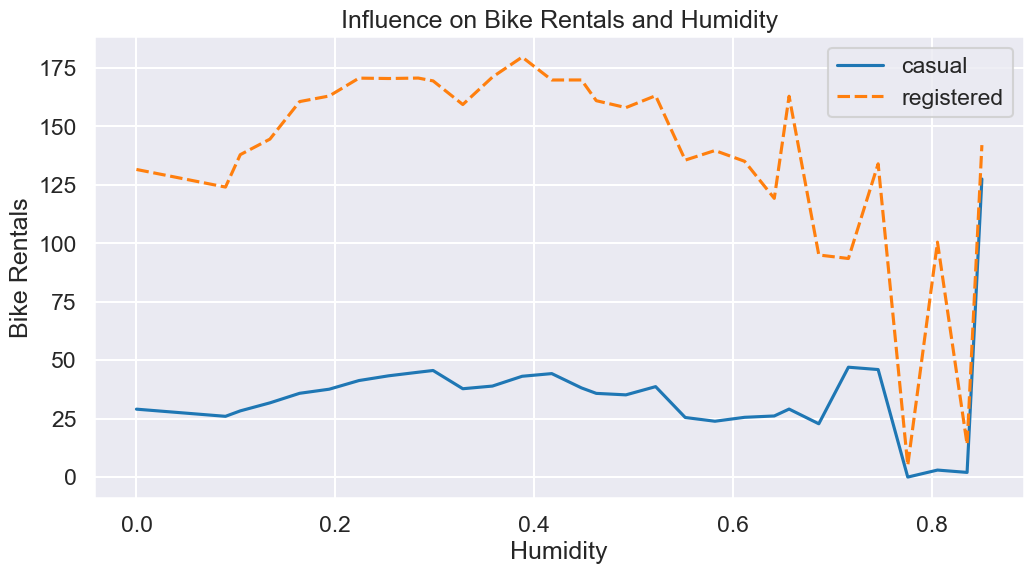

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=bikes_hour)
plt.xlabel('Humidity')
plt.ylabel('Bike Rentals')
plt.title('Influence on Bike Rentals and Humidity')


plt.legend(handles=[line1, line2])

plt.show()

/var/folders/28/lqytsck570bbnwy7thfhf1m40000gn/T/ipykernel_9828/145136063.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = bikes_day.groupby(bins)['registered', 'casual'].mean()


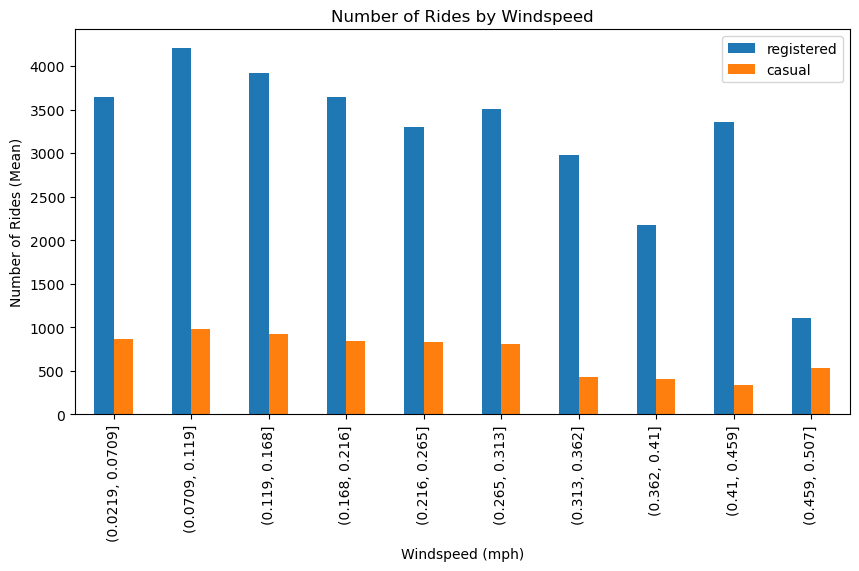

In [ ]:


# Create bins for windspeed
bins = pd.cut(bikes_day['windspeed'], bins=10)

# Group data by bins and calculate the mean of registered and casual users
grouped = bikes_day.groupby(bins)['registered', 'casual'].mean()

# Plot the data as a bar chart
ax = grouped.plot(kind='bar', figsize=(10, 5))

# Set the x-axis label
ax.set_xlabel('Windspeed (mph)')

# Set the y-axis label
ax.set_ylabel('Number of Rides (Mean)')

# Set the title
ax.set_title('Number of Rides by Windspeed')

# Show the plot
plt.show()


/var/folders/28/lqytsck570bbnwy7thfhf1m40000gn/T/ipykernel_9828/2852003360.py:10: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Registered', 'Casual')


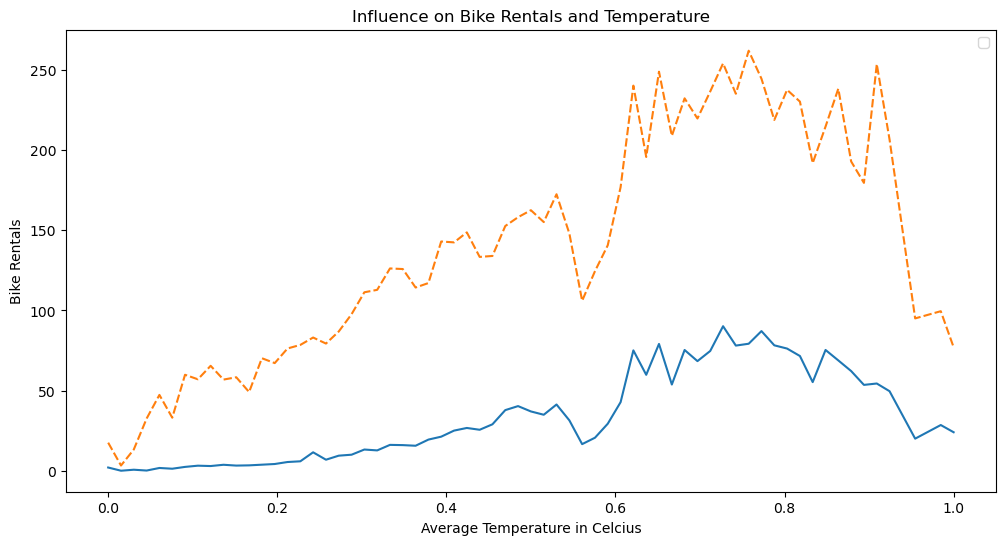

In [ ]:
# Group the data by hour and calculate the average count for members and non-members (got the code from Natalie, used group by method)
bikes_hour = bikes_hour.groupby('atemp')[['casual', 'registered']].mean()

# Plot the hourly trend for members and non-members
plt.figure(figsize=(12,6))
sns.lineplot(data=bikes_hour)
plt.xlabel('Average Temperature in Celcius')
plt.ylabel('Bike Rentals')
plt.title('Influence on Bike Rentals and Temperature')
plt.legend('Registered', 'Casual')
plt.show()

/var/folders/28/lqytsck570bbnwy7thfhf1m40000gn/T/ipykernel_9828/1394064500.py:10: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Registered', 'Casual')


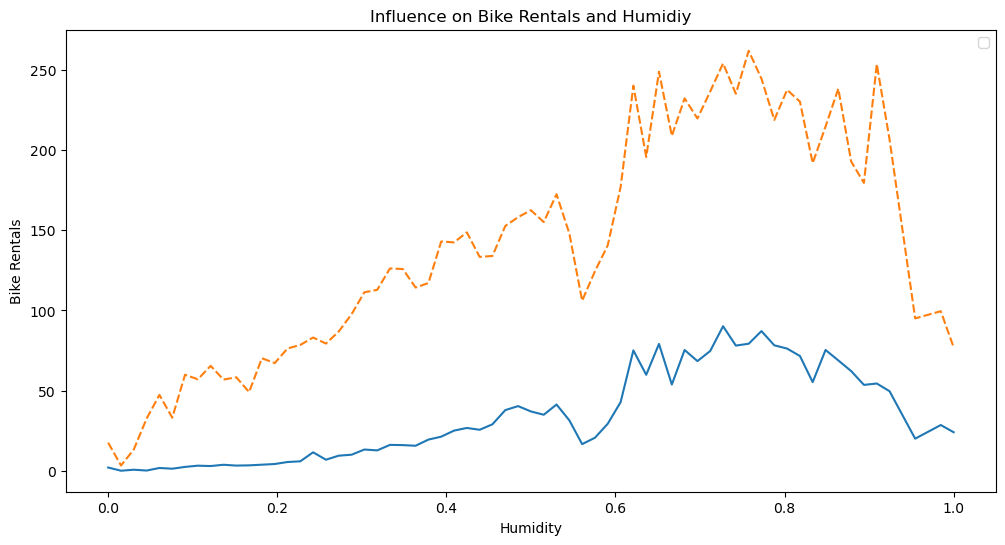

In [ ]:
# Group the data by hour and calculate the average count for members and non-members (got the code from Natalie, used group by method)
bikes_day = bikes_day.groupby('hum')[['casual', 'registered']].mean()

# Plot the hourly trend for members and non-members
plt.figure(figsize=(12,6))
sns.lineplot(data=bikes_hour)
plt.xlabel('Humidity')
plt.ylabel('Bike Rentals')
plt.title('Influence on Bike Rentals and Humidiy')
plt.legend('Registered', 'Casual')
plt.show()

In [ ]:
bikes_day.head ()

,casual,registered
windspeed,,
0.022392,949.0,4036.0
0.042304,1514.0,3603.0
0.045404,2235.0,3174.0
0.045408,120.0,1592.0
0.046650,337.0,4750.0


/var/folders/28/lqytsck570bbnwy7thfhf1m40000gn/T/ipykernel_9828/2012568261.py:10: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('Registered', 'Casual')


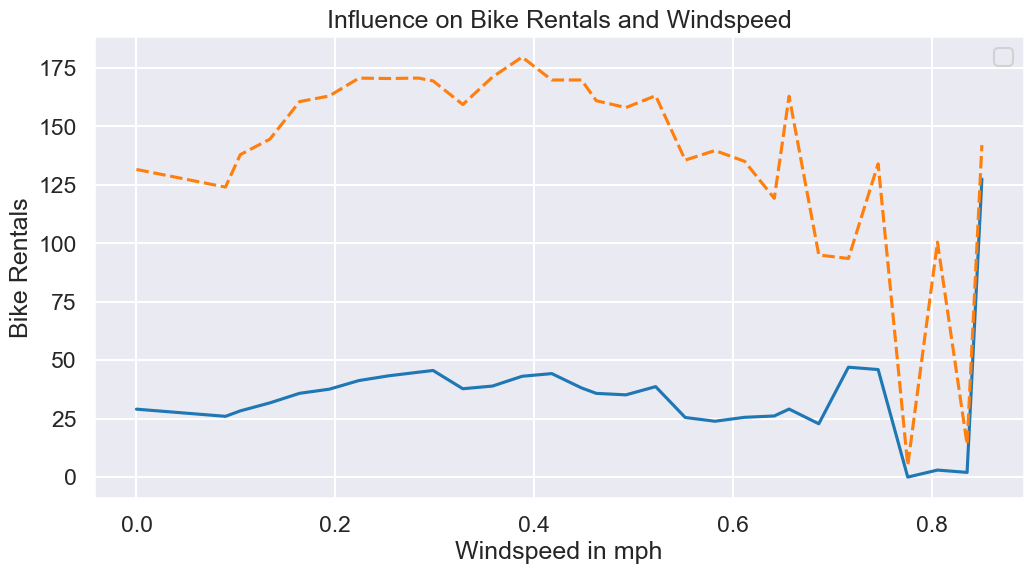

In [ ]:
# Group the data by hour and calculate the average count for members and non-members (got the code from Natalie, used group by method)
bikes_day = bikes_day.groupby('windspeed')[['casual', 'registered']].mean()

# Plot the hourly trend for members and non-members
plt.figure(figsize=(12,6))
sns.lineplot(data=bikes_hour)
plt.xlabel('Windspeed in mph')
plt.ylabel('Bike Rentals')
plt.title('Influence on Bike Rentals and Windspeed')
plt.legend('Registered', 'Casual')
plt.show()

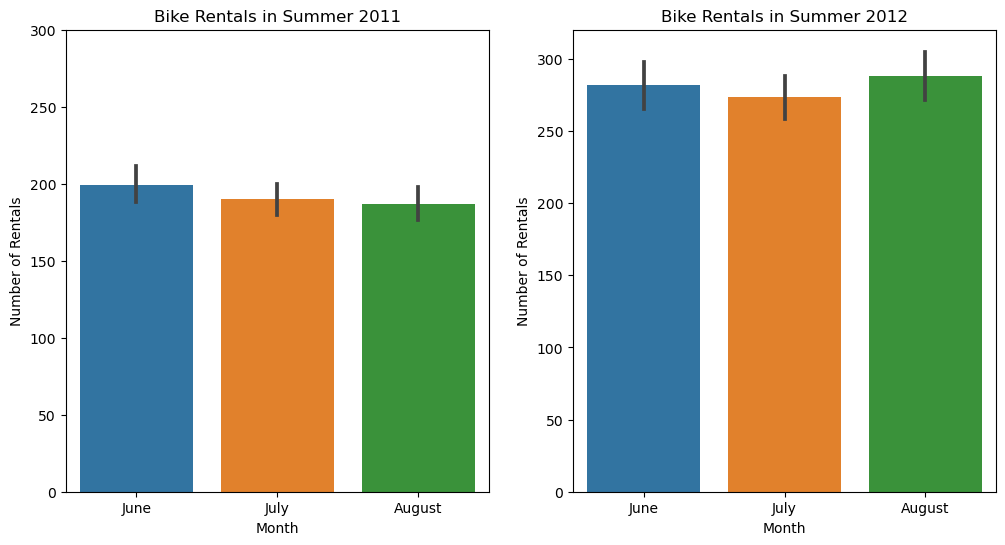

In [ ]:
# Filter data for 2011 summer
summer_2011 = bikes_hour[(bikes_hour['dteday'] >= '2011-06-01') & (bikes_hour['dteday'] <= '2011-08-31')]

# Filter data for 2012 summer
summer_2012 = bikes_hour[(bikes_hour['dteday'] >= '2012-06-01') & (bikes_hour['dteday'] <= '2012-08-31')]

# Create a figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Create a barplot for 2011 summer
sns.barplot(x='mnth', y='cnt', data=summer_2011, ax=axs[0])
axs[0].set_title('Bike Rentals in Summer 2011')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Number of Rentals')
axs[0].set_ylim(0, 300)  # 0Set y-axis limits#####

# Create a barplot for 2012 summer
sns.barplot(x='mnth', y='cnt', data=summer_2012, ax=axs[1])
axs[1].set_title('Bike Rentals in Summer 2012')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Number of Rentals')
axs[0].set_ylim(0, 300)  # Set y-axis limits#####
# Show the plot
plt.show()


In [ ]:
def new_func():
    bikes_hour['weekday_01'] = bikes_hour['dteday'].dt.day_name()

    print(bikes_hour.head(10))

new_func()

   instant     dteday  season  yr     mnth  hr  holiday  weekday workingday  \
0        1 2011-01-01  Winter   0  January   0        0        6         No   
1        2 2011-01-01  Winter   0  January   1        0        6         No   
2        3 2011-01-01  Winter   0  January   2        0        6         No   
3        4 2011-01-01  Winter   0  January   3        0        6         No   
4        5 2011-01-01  Winter   0  January   4        0        6         No   
5        6 2011-01-01  Winter   0  January   5        0        6         No   
6        7 2011-01-01  Winter   0  January   6        0        6         No   
7        8 2011-01-01  Winter   0  January   7        0        6         No   
8        9 2011-01-01  Winter   0  January   8        0        6         No   
9       10 2011-01-01  Winter   0  January   9        0        6         No   

  weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0        Yes  0.24  0.2879  0.81     0.0000       3       

In [ ]:
data = bikes_hour

bikes_hour ['weekday'] = bikes_hour['weekday'].replace({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

# print the updated DataFrame
print(bikes_hour.head())

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt, hour]
Index: []


In [ ]:
bikes_hour.head()

,casual,registered
windspeed,,
0.0000,29.054128,131.589450
0.0896,25.988070,124.049825
0.1045,28.324057,137.922696
0.1343,31.747411,144.560414
0.1642,35.838938,160.620059


In [ ]:
grouped_data = bikes_day.groupby(['weekday'])['cnt'].mean()


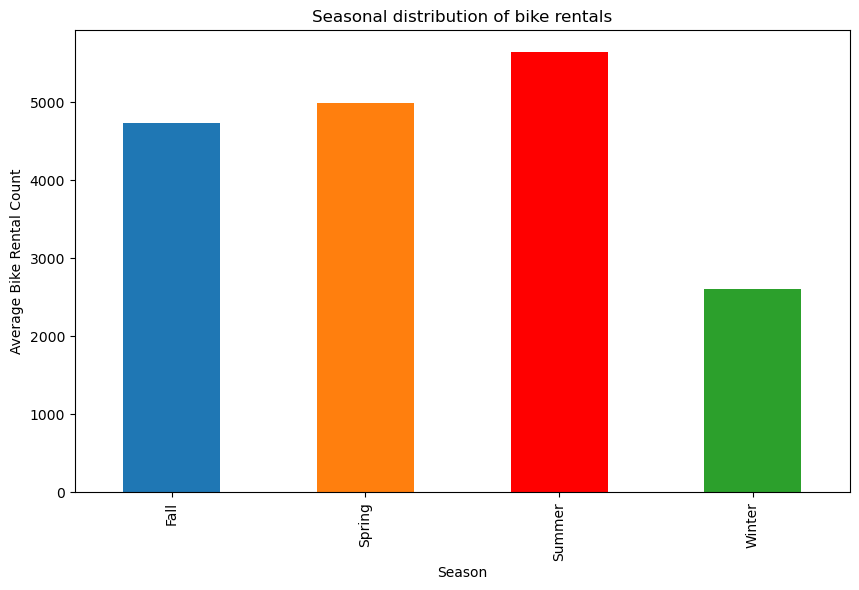

In [ ]:


# group the data by season and hour, and calculate the mean bike rental count
grouped_data = bikes_day.groupby(['season'])['cnt'].mean()

# reshape the data to a pivot table for plotting
#pivoted_data = grouped_data.reset_index().pivot(index='weekday', columns='season', values='cnt')

# create the bar chart

colors = ['C0', 'C1', 'red', 'C2']

# create the bar chart with the specified colors
grouped_data.plot(kind='bar', figsize=(10, 6), color=colors)


#pivoted_data.plot(kind='bar', figsize=(10, 6))
plt.title('Seasonal distribution of bike rentals')
plt.xlabel('Season')
plt.ylabel('Average Bike Rental Count')
plt.show()


In [ ]:
data['weekday_01'] = data['dteday'].dt.day_name()

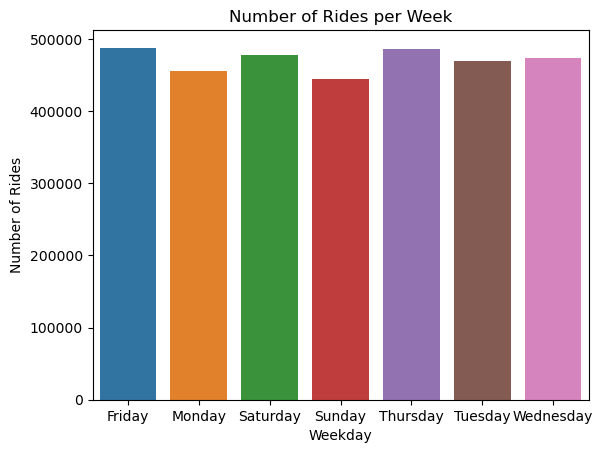

In [ ]:
data = bikes_day
rides_per_weekday = bikes_day.groupby('weekday_01')[['cnt']].sum()
rides_per_weekday = rides_per_weekday.reset_index()

# Create the bar plot using Seaborn
sns.barplot(x='weekday_01', y='cnt', data=rides_per_weekday)

# Set the title and axis labels
plt.title('Number of Rides per Week')
plt.xlabel('Weekday')
plt.ylabel('Number of Rides')

# Show the plot
plt.show()


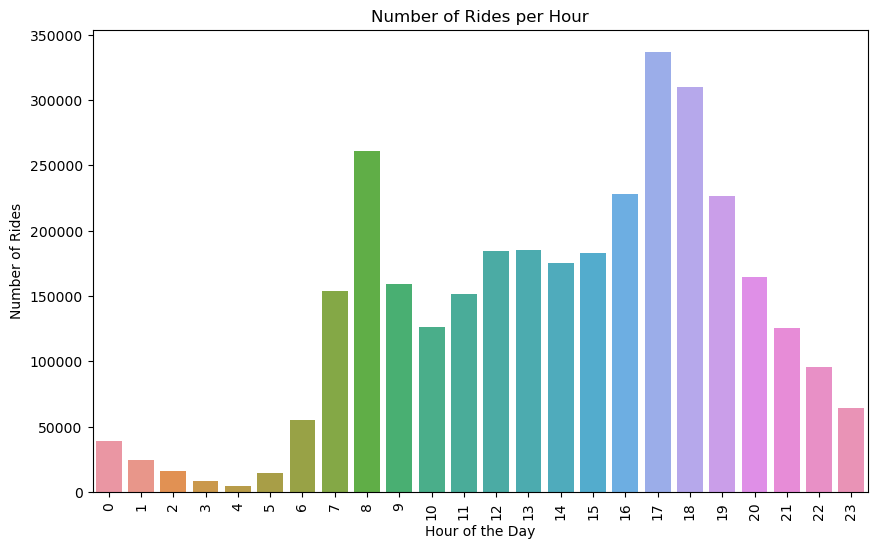

In [43]:
# Group the data by hour and sum the counts of registered and casual users
rides_per_hour = bikes_hour.groupby('hr')[['registered', 'casual']].sum()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=rides_per_hour.index, y=rides_per_hour['registered'] + rides_per_hour['casual'])

# Set the title and axis labels
plt.title('Number of Rides per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')

# Rotate the x-tick labels
plt.xticks(rotation=90)

# Show the plot
plt.show()




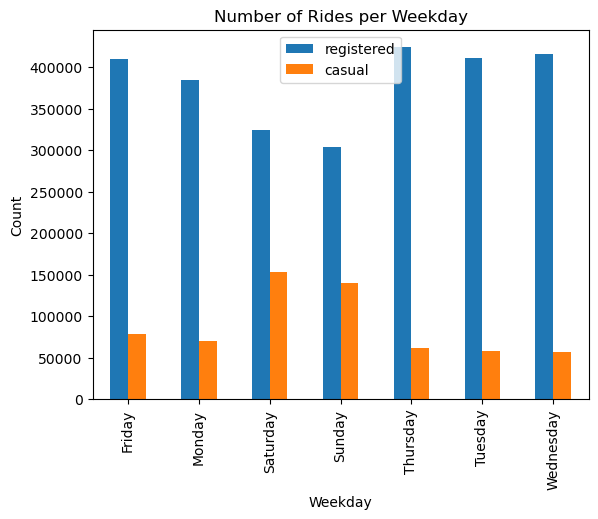

In [ ]:
data = bikes_day

# Convert the 'dteday' column to datetime and extract the weekday
bikes_day['dteday'] = pd.to_datetime(bikes_day['dteday'])
bikes_day['weekday'] = bikes_day['dteday'].dt.day_name()

# Group the data by weekday and sum up the registered and casual rides
rides_per_weekday = bikes_day.groupby('weekday')[['registered', 'casual']].sum()

# Create a bar plot
rides_per_weekday.plot(kind='bar')

# Set the title and axis labels
plt.title('Number of Rides per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')

# Show the plot
plt.show()


/var/folders/28/lqytsck570bbnwy7thfhf1m40000gn/T/ipykernel_9828/150634866.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='hr', y='cnt', hue='workingday', data=rides_per_hour, ci=None)


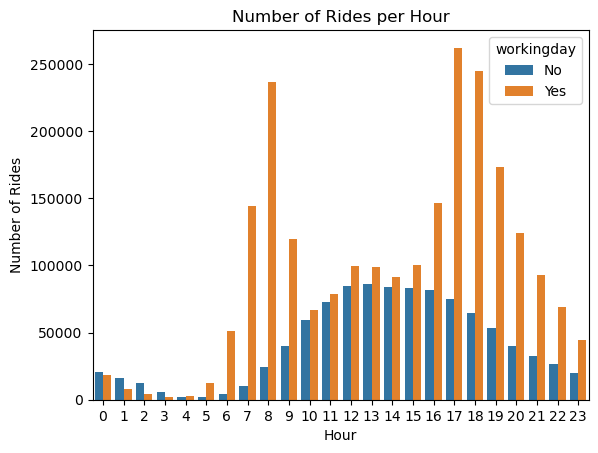

<Figure size 1600x1200 with 0 Axes>

In [ ]:
data = bikes_hour 


# Group the data by hour and workingday, and sum the counts
rides_per_hour = bikes_hour.groupby(['hr', 'workingday'])[['registered', 'casual', 'cnt']].sum().reset_index()

# Create a barplot using Seaborn
sns.barplot(x='hr', y='cnt', hue='workingday', data=rides_per_hour, ci=None)

# Set the title and axis labels
plt.title('Number of Rides per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')
plt.figure(figsize=(16, 12))
# Show the plot
plt.show()


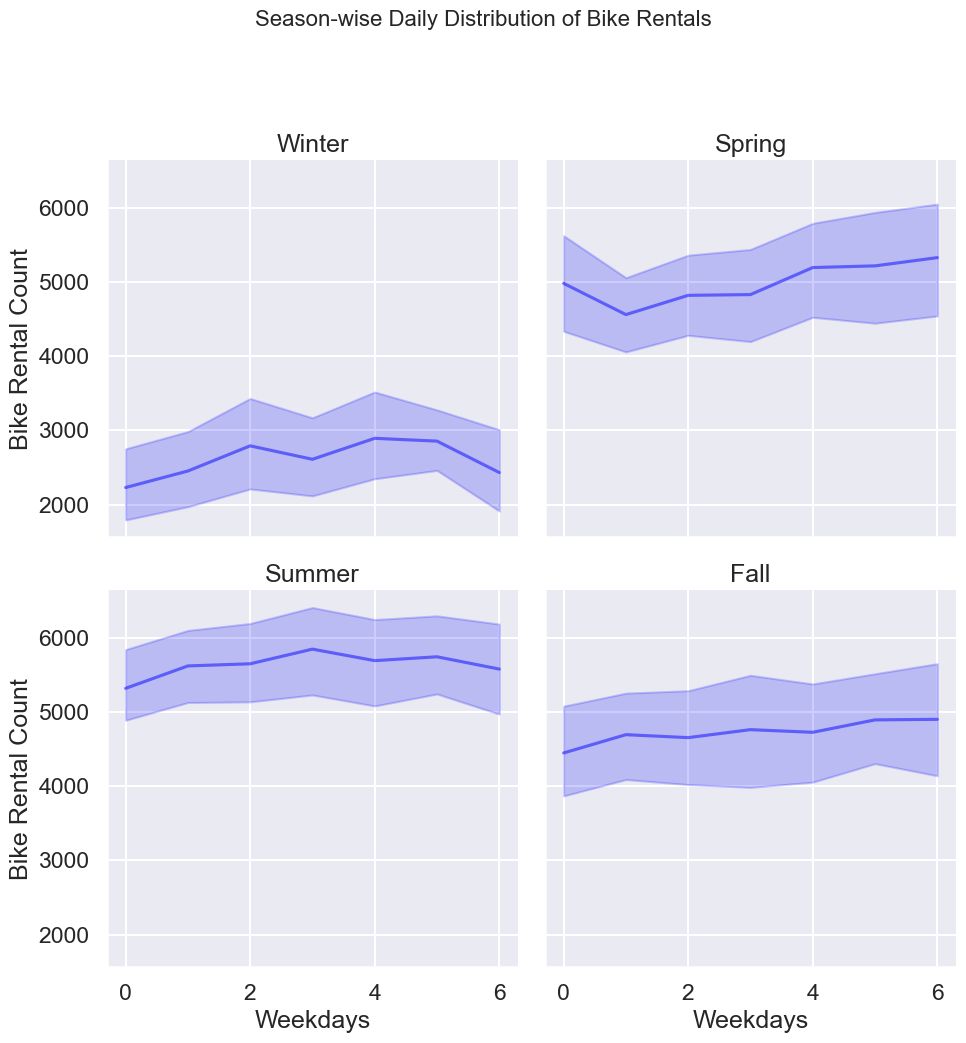

In [ ]:

rides_per_day = bikes_day.groupby(['season', 'workingday'])[['registered', 'casual', 'cnt']].sum().reset_index()

# create the FacetGrid plot
g = sns.FacetGrid(bikes_day, col='season', col_wrap=2, height=5)
g.map(sns.lineplot, 'weekday', 'cnt', color='blue', alpha=0.5)

# set plot titles and axis labels
g.set_titles('{col_name}')
g.set_ylabels('Bike Rental Count')

# set x-axis label
g.set(xlabel='Weekdays')

# set overall title
plt.suptitle('Season-wise Daily Distribution of Bike Rentals', y=1.05, fontsize=16)
plt.tight_layout()
plt.show()


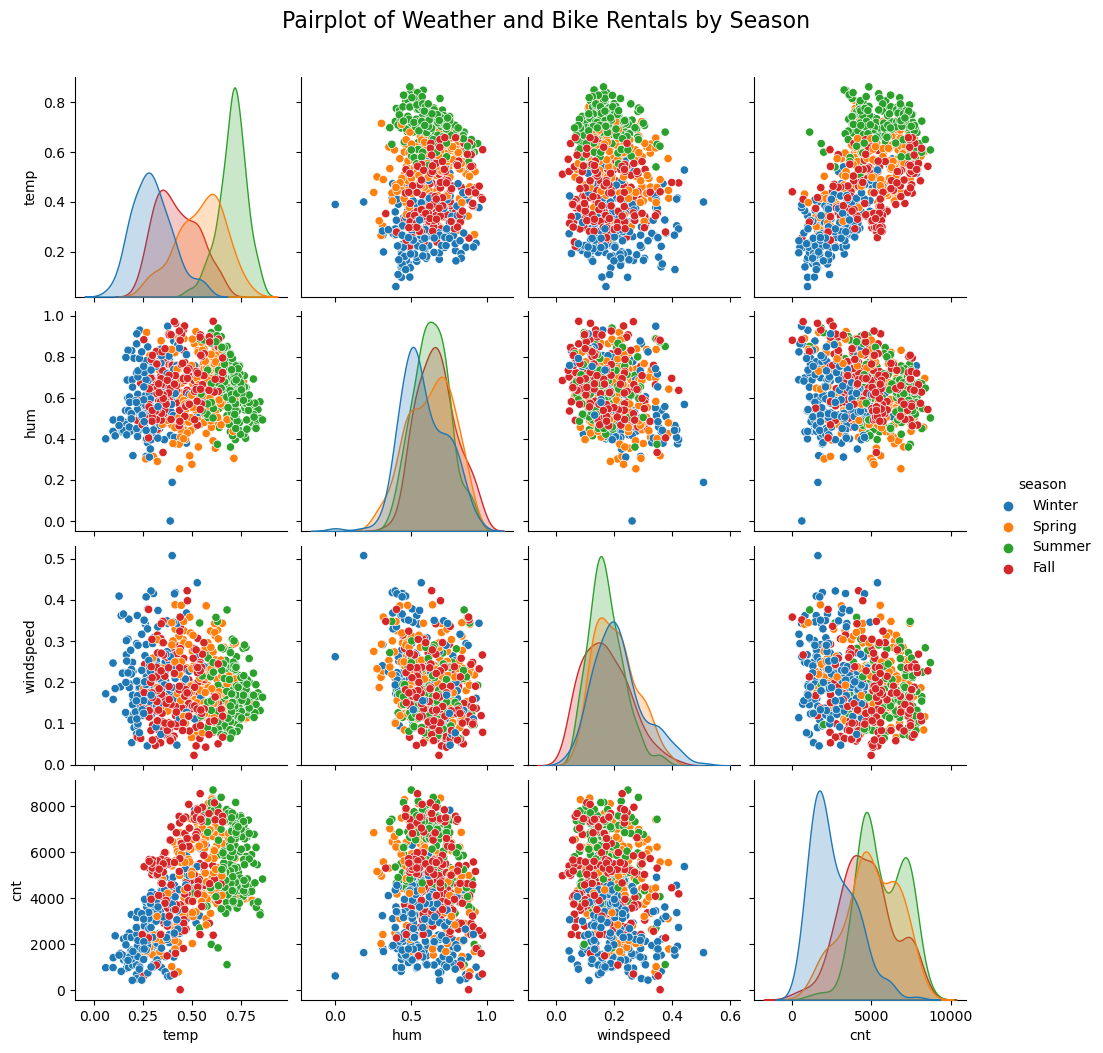

In [ ]:
data = bikes_day

# create a pairplot using Seaborn
sns.pairplot(data=bikes_day, vars=['temp', 'hum', 'windspeed', 'cnt'], hue='season')

# set plot title
plt.suptitle('Pairplot of Weather and Bike Rentals by Season', y=1.05, fontsize=16)

plt.show()


In [ ]:
data = bikes_hour

# replace 0 with 'No' and 1 with 'Yes' in the 'holiday' column
bikes_hour['holiday'] = bikes_hour['holiday'].replace({0: 'No', 1: 'Yes'})

# print the updated DataFrame
print(bikes_hour)

       instant      dteday  season  yr  mnth        hr holiday  weekday  \
0            1  2011-01-01       1   0     1  00:00:00      No        6   
1            2  2011-01-01       1   0     1  01:00:00      No        6   
2            3  2011-01-01       1   0     1  02:00:00      No        6   
3            4  2011-01-01       1   0     1  03:00:00      No        6   
4            5  2011-01-01       1   0     1  04:00:00      No        6   
...        ...         ...     ...  ..   ...       ...     ...      ...   
17374    17375  2012-12-31       1   1    12  19:00:00      No        1   
17375    17376  2012-12-31       1   1    12  20:00:00      No        1   
17376    17377  2012-12-31       1   1    12  21:00:00      No        1   
17377    17378  2012-12-31       1   1    12  22:00:00      No        1   
17378    17379  2012-12-31       1   1    12  23:00:00      No        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0          

In [ ]:
bikes_hour.head(5)

,casual,registered
windspeed,,
0.0000,29.054128,131.589450
0.0896,25.988070,124.049825
0.1045,28.324057,137.922696
0.1343,31.747411,144.560414
0.1642,35.838938,160.620059


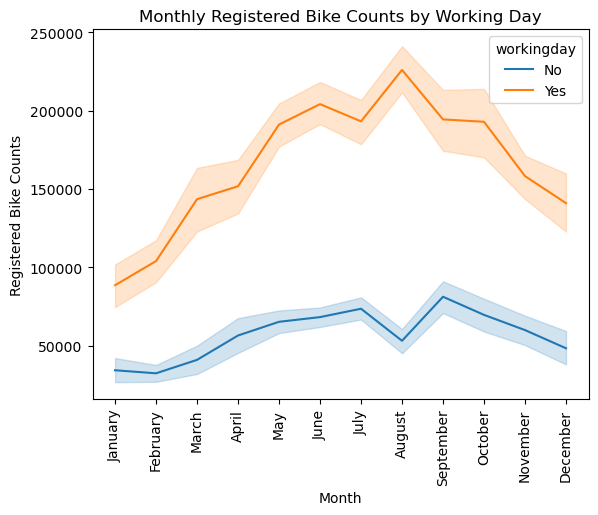

In [25]:

sns.lineplot(data=bikes_day, x="mnth", y="registered", hue="workingday", estimator = 'sum')

# set the title and axis labels
plt.title('Monthly Registered Bike Counts by Working Day')
plt.xlabel('Month')
plt.ylabel('Registered Bike Counts')
plt.xticks(rotation=90)

plt.show()

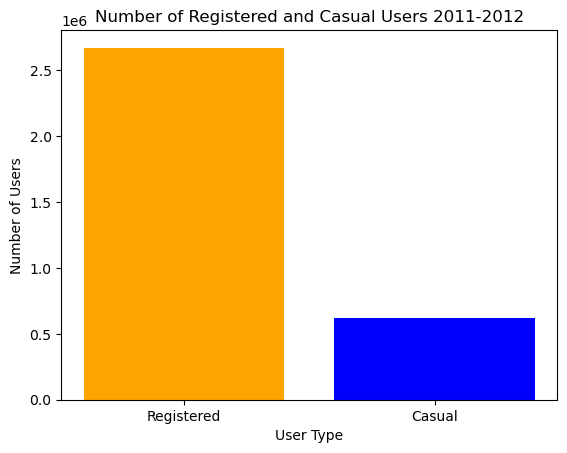

In [27]:

# Group the data by user type (registered or casual) and sum the counts
registered_data = bikes_hour['registered'].sum()
casual_data = bikes_hour['casual'].sum()

# Create a barplot using the grouped data
plt.bar(['Registered', 'Casual'], [registered_data, casual_data], color=['orange', 'blue'])

# Set the title and labels for the plot
plt.title('Number of Registered and Casual Users 2011-2012')
plt.xlabel('User Type')
plt.ylabel('Number of Users')

# Show the plot
plt.show()



/var/folders/28/lqytsck570bbnwy7thfhf1m40000gn/T/ipykernel_9828/3536658532.py:4: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  melted_data = pd.melt(bikes_hour, id_vars=['season'], value_vars=['registered', 'casual'], var_name='user_type', value_name='cnt')


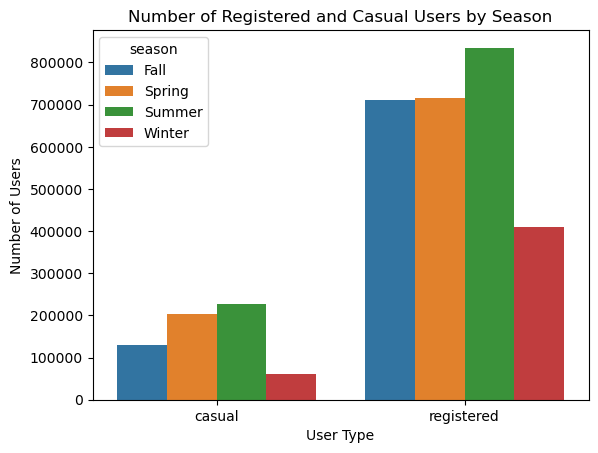

In [ ]:
data = bikes_day

# Melt the data to convert the registered and casual columns to a single column
melted_data = pd.melt(bikes_hour, id_vars=['season'], value_vars=['registered', 'casual'], var_name='user_type', value_name='cnt')

# Group the data by season, user type (registered or casual) and sum the counts
grouped_data = melted_data.groupby(['season', 'user_type']).sum()['cnt'].reset_index()

# Create a barplot using the grouped data and hue parameter
sns.barplot(x='user_type', y='cnt', hue='season', data=grouped_data)

# Set the title and labels for the plot
plt.title('Number of Registered and Casual Users by Season')
plt.xlabel('User Type')
plt.ylabel('Number of Users')

# Show the plot
plt.show()


In [ ]:
bikes_hour['dteday'] = pd.to_datetime(bikes_hour['dteday'])

/var/folders/28/lqytsck570bbnwy7thfhf1m40000gn/T/ipykernel_9828/2553332892.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(xtick_labels)
/var/folders/28/lqytsck570bbnwy7thfhf1m40000gn/T/ipykernel_9828/2553332892.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(labels=plt.gca().get_xticklabels(), rotation=90, ha='right')


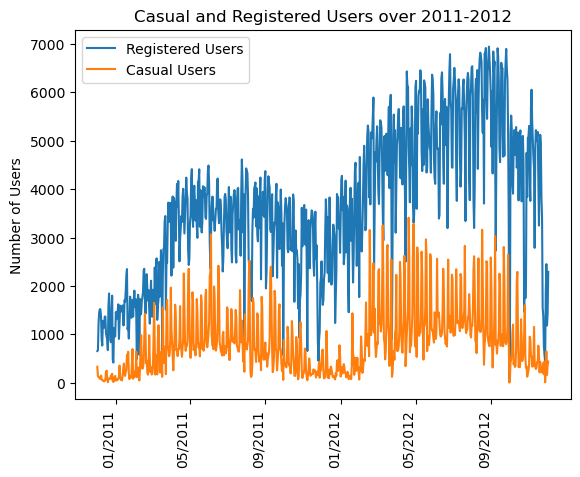

In [ ]:


# Create a lineplot
sns.lineplot(x="dteday", y="registered", data=bikes_day, label="Registered Users")
sns.lineplot(x="dteday", y="casual", data=bikes_day, label="Casual Users")

# Set the title and axis labels
plt.title("Casual and Registered Users over 2011-2012")
plt.xlabel("")
plt.ylabel("Number of Users")

# Set the x-axis tick labels
xtick_labels = ["1/2011", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "12/2012"]
plt.gca().set_xticklabels(xtick_labels)
plt.gca().set_xticklabels(labels=plt.gca().get_xticklabels(), rotation=90, ha='right')


date_fmt = '%m/%Y'
date_ticks = pd.date_range(start=bikes_day['dteday'].min(), end=bikes_day['dteday'].max(), freq='4M')
date_ticklabels = [date.strftime(date_fmt) for date in date_ticks]
plt.xticks(date_ticks, date_ticklabels, rotation=90)

plt.title("Casual and Registered Users over 2011-2012")
# Show the plot
plt.show()


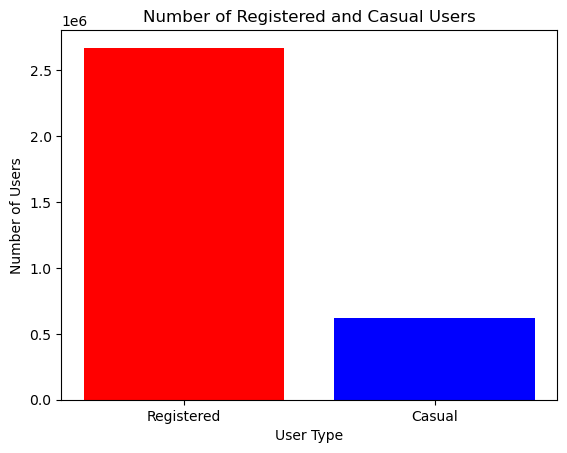

In [ ]:
data = bikes_day

# Group the data by user type (registered or casual) and sum the counts
registered_data = data['registered'].sum()
casual_data = data['casual'].sum()

# Create a barplot using the grouped data
plt.bar(['Registered', 'Casual'], [registered_data, casual_data], color=['red', 'blue'])

# Set the title and labels for the plot
plt.title('Number of Registered and Casual Users')
plt.xlabel('User Type')
plt.ylabel('Number of Users')

# Show the plot
plt.show()


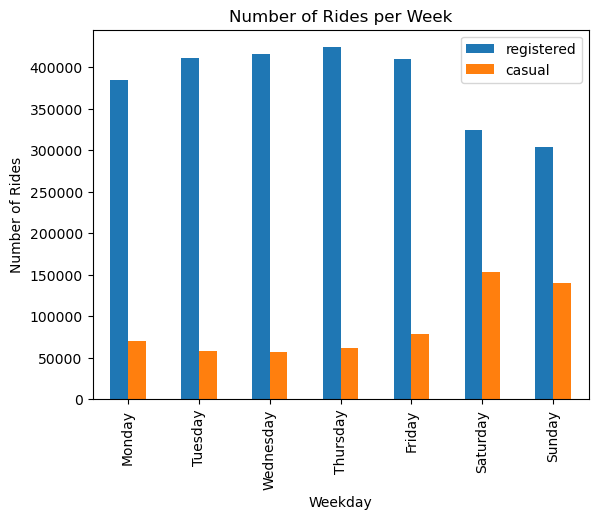

<Figure size 1600x1200 with 0 Axes>

In [ ]:
data = bikes_hour

data['dteday'] = pd.to_datetime(data['dteday'])

# Extract the weekday from the 'dteday' column and create a new column for it
data['weekday'] = data['dteday'].dt.day_name()

# Define the order of the weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a categorical data type for the 'weekday' column with the desired order of the weekdays
weekday_cat = pd.Categorical(data['weekday'], categories=weekday_order, ordered=True)
data['weekday'] = weekday_cat

# Group the data by weekday and calculate the sum of registered and casual rides
rides_per_weekday = data.groupby('weekday')[['registered', 'casual']].sum()

# Create a barplot with the grouped data
rides_per_weekday.plot(kind='bar')

# Set the title and axis labels
plt.title('Number of Rides per Week')
plt.xlabel('Weekday')
plt.ylabel('Number of Rides')
plt.figure(figsize=(16, 12))

# Show the plot
plt.show()


/var/folders/28/lqytsck570bbnwy7thfhf1m40000gn/T/ipykernel_9828/1879712305.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='hr', y='cnt', hue='holiday', data=rides_per_hour, ci=None)


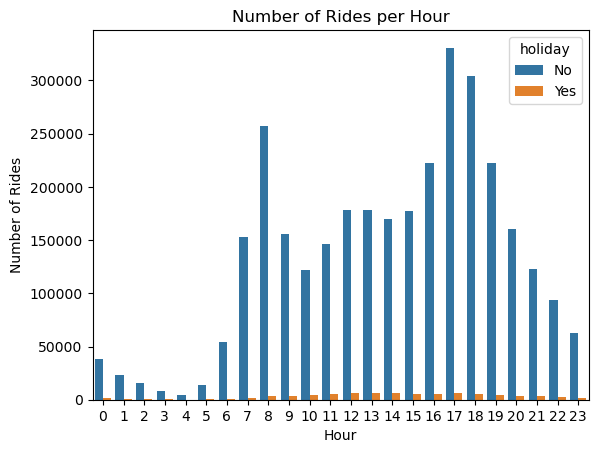

<Figure size 1600x1200 with 0 Axes>

In [ ]:


# Group the data by hour and workingday, and sum the counts
rides_per_hour = bikes_hour.groupby(['hr', 'holiday'])[['registered', 'casual', 'cnt']].sum().reset_index()

# Create a barplot using Seaborn
sns.barplot(x='hr', y='cnt', hue='holiday', data=rides_per_hour, ci=None)

# Set the title and axis labels
plt.title('Number of Rides per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')
plt.figure(figsize=(16, 12))
# Show the plot
plt.show()


do the same for hour and then weekend yes or no, for that I have to replace weekend with 0 1

In [ ]:

bikes_hour['temp_celsius'] = bikes_hour['temp'].apply(lambda x: (x - 32) * 5/9)


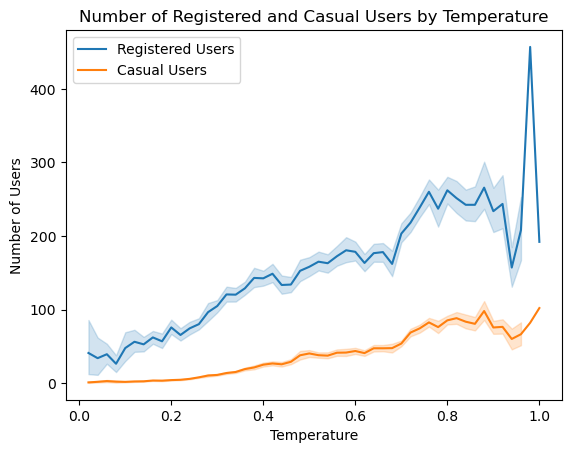

In [ ]:
# Create a line plot with temperature on x-axis and cnt on y-axis, differentiated by registered and casual users
sns.lineplot(x="temp", y="registered", data=bikes_hour, label="Registered Users")
sns.lineplot(x="temp", y="casual", data=bikes_hour, label="Casual Users")

# Set the title and axis labels
plt.title("Number of Registered and Casual Users by Temperature")
plt.xlabel("Temperature")
plt.ylabel("Number of Users")

# Show the plot
plt.show()

#####temperature does not show in the correct way, I need to fix that but don't know how, already formatted it to Celcius

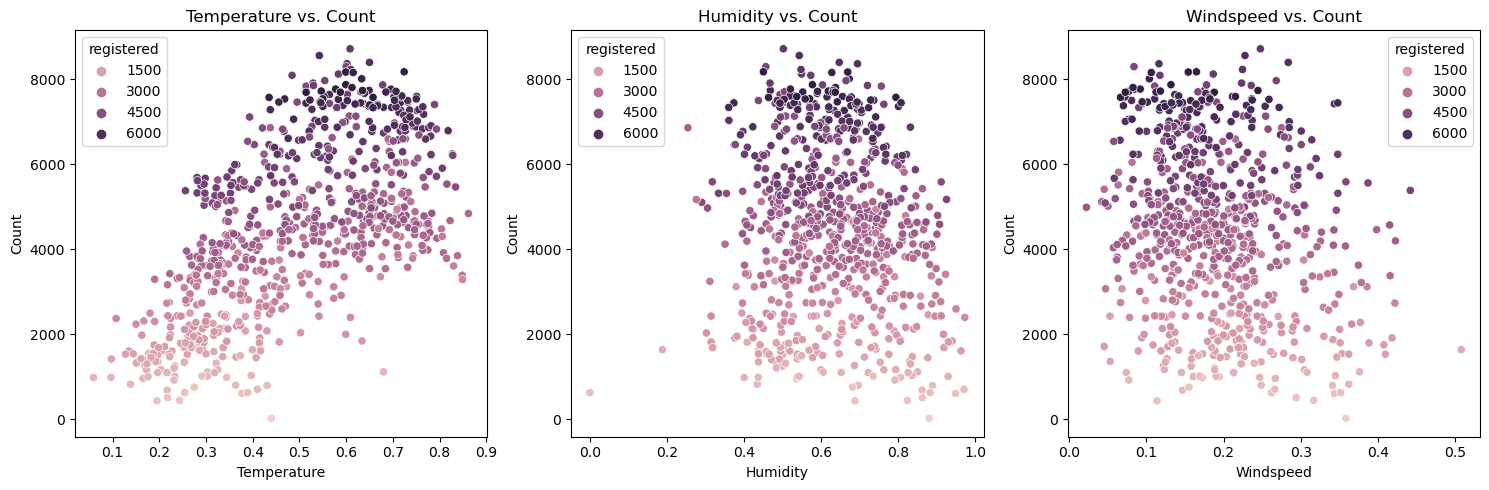

In [ ]:
# Create three subplots side by side
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

# Plot 1: Temperature vs. Count
sns.scatterplot(x='temp', y='cnt', hue='registered', data=bikes_day, ax=axs[0])
axs[0].set_xlabel('Temperature')
axs[0].set_ylabel('Count')
axs[0].set_title('Temperature vs. Count')

# Plot 2: Humidity vs. Count
sns.scatterplot(x='hum', y='cnt', hue='registered', data=bikes_day, ax=axs[1])
axs[1].set_xlabel('Humidity')
axs[1].set_ylabel('Count')
axs[1].set_title('Humidity vs. Count')

# Plot 3: Windspeed vs. Count
sns.scatterplot(x='windspeed', y='cnt', hue='registered', data=bikes_day, ax=axs[2])
axs[2].set_xlabel('Windspeed')
axs[2].set_ylabel('Count')
axs[2].set_title('Windspeed vs. Count')

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plots
plt.show()
